In [26]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re
from collections import Counter
from konlpy.tag import Okt
from konlpy.tag import Kkma
import operator
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from tensorflow import keras

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic

In [27]:
# 가중치 시각화 //파이썬 버전을 꼭 확인하기
model = keras.models.load_model('cnn_model.keras')

In [28]:
model.layers[0]

<Conv2D name=conv2d_4, built=True>

In [29]:
# 필터 (3,3,32), 가중치 32
conv = model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [30]:
# numpy타입으로 변경
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.027068287 0.2526298


Text(0, 0.5, 'count')

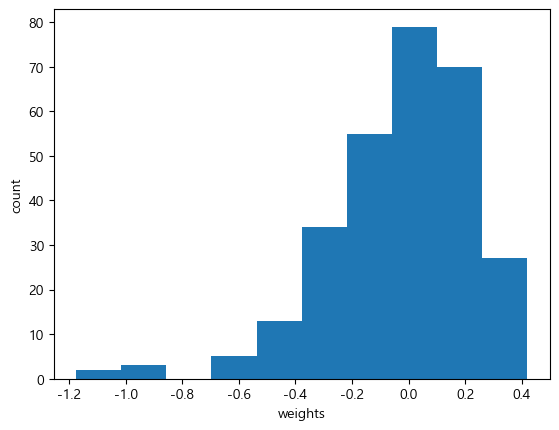

In [31]:
# 1차원 행렬로 변경
# 각각의 값을 히스토그램에 출력
# 0에 근접할수록 의미가 없음, 다른 값들은 의미가 존재
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')

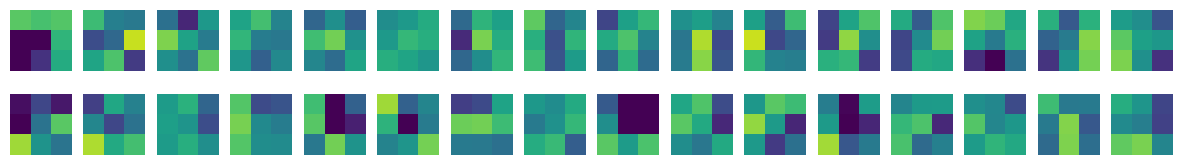

In [32]:
# 3*3*1 사이즈 32개 이미지 출력
# 이미지 출력 2행 16열 형태로 그래프 출력
# vmin=-0.5,vmax=0.5 이미지마다 밝기가 다르기에, 이것을 기준점으로 통일
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
     for j in range(16):
          axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
          axs[i,j].axis('off')
plt.show()

In [33]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',
                                          input_shape=(28,28,1)))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [35]:
no_training_weights = no_training_conv.weights[0].numpy()

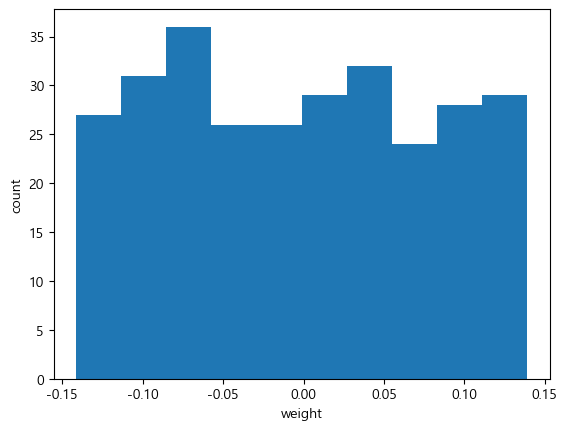

In [36]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()